In [1]:
import ezomero as ez
from getpass import getpass

In [2]:
USER = "participant-a"
PWD = getpass(prompt=f"Password for {USER}")
OMERO_GROUP = "Workshop Metadata Annotation"
HOST = "wss://omero-training.gerbi-gmb.de/omero-wss"
PORT = 443

Password for participant-a ········


In [4]:
conn = ez.connect(USER, PWD, group=OMERO_GROUP, host=HOST, port=PORT, secure=True)
print(f"Is connected: {conn.isConnected()}")

Is connected: True


# Getting an image object with omero-py

In [5]:
img_o = conn.getObject("Image", 7352)

<_ImageWrapper id=7352>
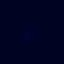

In [9]:
img_o

# Accessing image properties: img_o.get + TAB

In [14]:
img_o.getParent().simpleMarshal()

{'type': 'Dataset',
 'id': 208,
 'name': 'z-stack',
 'description': 'idr0101\r\nhttps://idr.openmicroscopy.org/webclient/?show=project-2051\r\nCC BY 4.0 https://creativecommons.org/licenses/by/4.0/'}

In [12]:
img_o.getChannels()[0].simpleMarshal()

{'type': 'Channel', 'id': 7374, 'name': 'CENP-A', 'description': ''}

In [31]:
img_o.getPixelSizeX(), img_o.getPixelSizeY(), img_o.getPixelSizeZ()

(0.16250000000000142, 0.16249999999999964, 0.398406374501992)

In [32]:
img_o.getPixelsType()

'uint16'

In [34]:
img_o.getSizeX(), img_o.getSizeY(), img_o.getSizeC(), img_o.getSizeZ(), img_o.getSizeT()

(2048, 2048, 3, 251, 1)

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
row = np.array(img_o.getRow(z=126, t=0, y=1164))

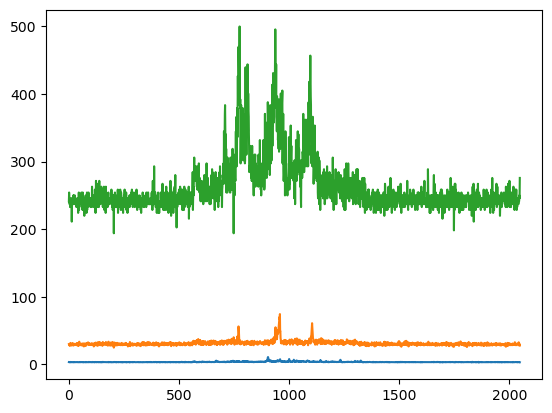

In [52]:
plt.figure()
plt.plot(row.T)

https://omero.readthedocs.io/en/stable/developers/Model/EveryObject.html#omero-model-class-image